In [7]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from numpy import roll, dstack

def align(img):
    img_f=img_as_float(img) # Преобразуем значения изображения в вещественные

    h=img_f.shape[0]//3 # Делим его на три равные части по высоте, обрезаем края по 5%
    edge = int(img.shape[0]*0.05)
    
    b=img_f[0+edge:h-edge,edge:img_f.shape[1]-edge] # выделяем синий канал
    g=img_f[h+edge:2*h-edge,edge:img_f.shape[1]-edge] # выделяем зеленый канал
    r=img_f[2*h+edge:3*h-edge,edge:img_f.shape[1]-edge] # выделяем красный канал
    
    maxcor=0 # задаем переменную схожести
    for i in range(-15,15,1):  # Сдвигаем синий канал по двум осям 
        bi=roll(b,i,0)
        for j in range(-15,15,1):
            bj=roll(bi,j,1), 
            correlation=(bj*g).sum()
            if(correlation>maxcor):
                maxcor=correlation  # Чем больше корреляция, тем более похожи два изображения
                sb0=i
                sb1=j
    maxcor=0 # По аналогии, красный накладываем на зеленый
    for i in range(-15,15,1):
        ri=roll(r,i,0)
        for j in range(-15,15,1):
            rj=roll(ri,j,1)
            correlation=(rj*g).sum()
            if(correlation>maxcor):
                maxcor=correlation
                sr0=i
                sr1=j
    r = roll(r, sr0, 0)
    r = roll(r, sr1, 1)
    b= roll(b, sb0, 0)
    b = roll(b, sb1, 1)
    result = dstack((r, g, b)) # складываем каналы
    return result
picture = imread("07.png") # Загружаем скан фотопленки из файла

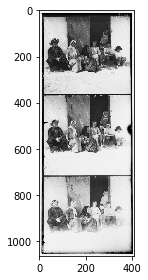

In [8]:
imshow(picture)

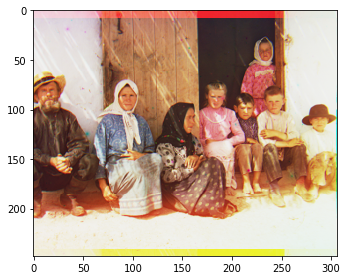

In [9]:
imshow(align(picture))